In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
df=pd.read_csv('/content/emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [4]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [5]:
df.dropna(inplace = True)
df.drop(['Email No.'],axis=1,inplace=True)

In [6]:
X = df.drop(['Prediction'],axis = 1)
y = df['Prediction']

In [7]:
from sklearn.preprocessing import scale
X = scale(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
random_state = 42)

# **KNN Classifier**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [21]:
y_pred = knn.predict(X_test)
print("Prediction",y_pred)

Prediction [0 0 1 ... 1 1 1]


In [26]:
print("KNN accuracy = ",metrics.accuracy_score(y_test,y_pred)*100,"%")

KNN accuracy =  80.09020618556701 %


In [23]:
print("Confusion matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Confusion matrix:
 [[804 293]
 [ 16 439]]


Text(50.722222222222214, 0.5, 'Predicted value')

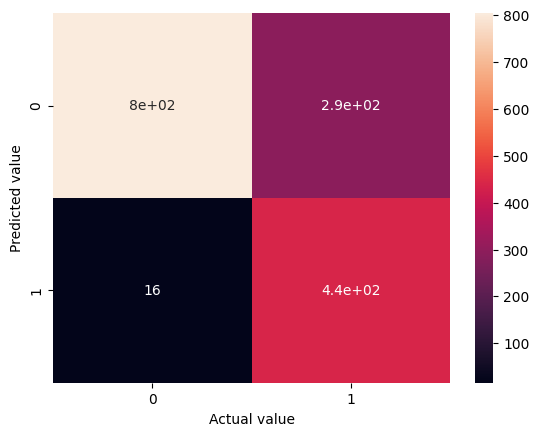

In [24]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")

# **SVM Classifier**

In [27]:
model = SVC(C = 1)
# fit
model.fit(X_train, y_train)

SVC(C=1)

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [30]:
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1091,    6],
       [  90,  365]])

Text(50.722222222222214, 0.5, 'Predicted value')

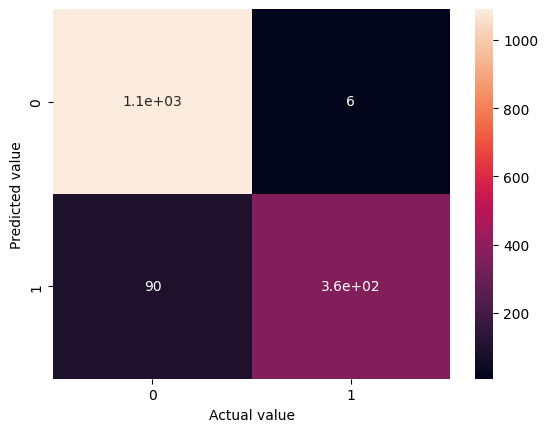

In [31]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")

In [16]:
print("SVM accuracy = ",metrics.accuracy_score(y_test,y_pred)*100,"%")

SVM accuracy =  93.81443298969072 %
